In [1]:
#Create psuedo code outline for this project.
#for EDA part will need to include visuals.
# will need to import everything: pandas, numpy, matplotlib, statsmodels, seaborn,.
# in initial EDA should include: info(), head(), shape, describe(), count nulls, review uniques in certain cases.
#potentially convvert data types of certain columns.
# should also include a histogram or two.

In [2]:
#OSEMN FRAMEWORK:
# Obtain - from another location extract and generate data.
# Scrub - filtering lines, extracting columns, replacing values, handling missing values, converting formats.
# Explore - understand data, deriving statistics, creating visualization.
# Model - clustering, classification, regression, dimensionality reduction.
# Interpret - drwaing conclusions from data, evaluate meaning of results, communicating result.

#Approach to the project through this framework is as follows:
#import was relatively simple as the file is in the notebook directly.  Once the file is imported and all necessary
#packages are imported (pandas, numpy, statsmodels, scikitlearn, matplotlib) then EDA begins with an exam for
#correct data types, null and missing values.  After this review and creating some visualizations to properly diagnose
#the data set, then next a model will need to be created for the prediction of the future pricing of these houses.
#Log transforming some variables and using RFE to narrow down feature selection comes next.
#Then, actual multiple linear regression models will be created to measure predictions for the prices of these houses.

In [ ]:
# APPROACH TO THE PROJECT THROUGH THE OSEMN FRAMEWORK:
#This project poses an interesting mix of data to use in order to find good predictors for the price of a house in this
#market.  Fill in the actual definition of the OSEMN framework.
#The actual obtaining of the data was quite straightforward - import was direct since it was already in the notebook.
#data types were relatively straightforward with only 2 columns being "object" data type and needing to be converted
#they were: the date column and the sqft_basement column.  The date column was converted to the date/time data type and
#Month and Day_of_week columns were also added.  The sqft_basement column was converted to a float64 data type.
#The filtering of lines, extracting of columns and handling of missing values section centered mainly around null values
#for only 3 columns: waterfront, view and yr_renovated.  Each part of null values were addressed.


## Import necessary packages

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.formula.api import ols
import seaborn as sns
%matplotlib inline

## Import file with data

In [164]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Dropping id column

* The 'id' column is only an identifier and is acting like an index.  Since an index already exists this column can be dropped.

In [165]:
df.drop(['id'], axis=1, inplace=True)

In [166]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Creating a new "yr_renovated_update" column.

* This is due to the fact that only 5% of houses have been renovated so it should have little impact on overall house prices.  The original "yr_renovated" column will remain for now and be removed before log transformation.

* Null values exist in the "yr_renovated" column.

In [167]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

* 95% of the houses in this data set have not been renovated per the below - they are those with a value of "0".

In [168]:
df.yr_renovated.value_counts(normalize=True).head()

0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
Name: yr_renovated, dtype: float64

* Using a "where" statement to convert all values that do not have a year associated with them to "0".  All other values (those houses that have been renovated) are converted to a value of "1".

In [169]:
df['yr_renovated_update'] = np.where(df['yr_renovated'] == 0, 0, 1)

* Confirming the conversion has been done.

In [170]:
df['yr_renovated_update'].unique()

array([0, 1], dtype=int64)

In [171]:
df.yr_renovated_update.head()

0    0
1    1
2    1
3    0
4    0
Name: yr_renovated_update, dtype: int32

In [172]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,1
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


In [173]:
df.yr_renovated_update.value_counts()

0    17011
1     4586
Name: yr_renovated_update, dtype: int64

## General review of Shape, Info and Describe.

In [174]:
df.shape

(21597, 21)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
date                   21597 non-null object
price                  21597 non-null float64
bedrooms               21597 non-null int64
bathrooms              21597 non-null float64
sqft_living            21597 non-null int64
sqft_lot               21597 non-null int64
floors                 21597 non-null float64
waterfront             19221 non-null float64
view                   21534 non-null float64
condition              21597 non-null int64
grade                  21597 non-null int64
sqft_above             21597 non-null int64
sqft_basement          21597 non-null object
yr_built               21597 non-null int64
yr_renovated           17755 non-null float64
zipcode                21597 non-null int64
lat                    21597 non-null float64
long                   21597 non-null float64
sqft_living15          21597 non-null int64
sqft_lot15             21597 non-null

In [176]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,0.212344
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950,0.408977
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000


## DROPPING BEDROOMS:

* Dropping single house with 33 bedrooms

In [177]:
df[df['bedrooms']==33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update
15856,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,...,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700,0


In [178]:
df.drop(df.index[15856], inplace=True)

* Dropping all houses with more than 7 bedrooms

In [179]:
df[df['bedrooms']>=7]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update
556,6/20/2014,1950000.0,7,3.50,4640,15235,2.0,NaN,1.0,3,...,2860,1780.0,1965,2003.0,98040,47.5666,-122.231,3230,20697,1
1134,1/5/2015,420000.0,7,3.00,2940,8624,1.0,0.0,0.0,3,...,1690,1250.0,1977,NaN,98155,47.7555,-122.307,1850,8031,1
1239,6/23/2014,350000.0,7,3.00,2800,9569,1.0,0.0,2.0,3,...,1400,1400.0,1963,0.0,98056,47.5102,-122.183,2150,7333,0
1658,12/4/2014,490000.0,8,5.00,2800,2580,2.0,0.0,0.0,3,...,1880,920.0,1997,0.0,98122,47.6086,-122.303,1800,2580,0
3717,1/15/2015,884900.0,7,4.75,5370,10800,1.5,0.0,0.0,3,...,5370,0.0,1967,0.0,98040,47.5380,-122.223,2310,10910,0
4020,10/7/2014,800000.0,7,6.75,7480,41664,2.0,0.0,2.0,3,...,5080,2400.0,1953,NaN,98166,47.4643,-122.368,2810,33190,1
4031,10/7/2014,2150000.0,8,6.00,4340,9415,2.0,0.0,0.0,3,...,4340,0.0,1967,0.0,98004,47.6316,-122.202,2050,9100,0
4063,2/19/2015,373000.0,8,3.00,2850,12714,1.0,NaN,0.0,3,...,2850,0.0,1959,0.0,98055,47.4859,-122.205,1480,4942,0
4092,5/7/2014,599999.0,9,4.50,3830,6988,2.5,0.0,0.0,3,...,2450,1380.0,1938,0.0,98103,47.6927,-122.338,1460,6291,0
4231,1/6/2015,700000.0,9,3.00,3680,4400,2.0,0.0,0.0,3,...,2830,850.0,1908,0.0,98102,47.6374,-122.324,1960,2450,0


* 61 rows of houses with 7 or more bedrooms will be dropped.

In [180]:
df = df[df['bedrooms'] <7]
df.shape

(21535, 21)

* Confirming the conversion has been done.

In [181]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update
count,2.153500e+04,21535.000000,21535.000000,21535.000000,2.153500e+04,21535.000000,19164.000000,21472.000000,21535.000000,21535.000000,21535.000000,21535.000000,17707.000000,21535.000000,21535.000000,21535.000000,21535.000000,21535.000000,21535.000000
mean,5.390889e+05,3.359786,2.111400,2075.221779,1.509742e+04,1.493360,0.007618,0.233420,3.409705,7.656280,1785.243836,1971.039053,83.185012,98077.929557,47.559926,-122.213864,1985.835663,12759.793220,0.212027
std,3.652086e+05,0.875090,0.762291,909.693683,4.142101e+04,0.539494,0.086953,0.765083,0.650431,1.171862,823.245932,29.359903,398.906548,53.523854,0.138642,0.140803,684.596314,27274.117437,0.408753
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,3.210000e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.470400,-122.328000,1490.000000,5100.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.615000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7620.000000,0.000000
75%,6.430000e+05,4.000000,2.500000,2540.000000,1.066750e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10081.500000,0.000000
max,7.700000e+06,6.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000


In [183]:
df.bedrooms.unique()

array([3, 2, 4, 5, 1, 6], dtype=int64)

In [184]:
df.bedrooms.value_counts()

3    9824
4    6882
2    2760
5    1601
6     272
1     196
Name: bedrooms, dtype: int64

In [ ]:
#considerations:
#date - convert that using "astype"?  convert to pandas date/time - can pull out month variable or day of week
#feature engineering is preferred - the actual adding of a column.  common to save a different copy of the data-in work world
# good to dive in with other column additions.
#bedrooms - will remove the 33 bedroom house as this is clearly an outlier.  Also decided to remove houses with
#7 or more bedrooms as these are clearly outliers.
#waterfront - missing values, likely nulls, will need to be replaced.  not necessarily a right answer - could drop
# could take a median or mean.  could fill it with the mode - do value counts on waterfront - if missing then is a waterfront
# if waterfront missing and group by latitude/longitude and see if near neighbor then make it waterfront.
#view - small amount of missing values, could be nulls.
#sqft_basement - needs to be converted from object to integer.  proabably some string values in here - deal with ''?''
#yr_renovated - some missing values.  need to deal with nulls. converted nulls to zeros.
#likely categorical data.  make binary column?? reno or not?
# drop yr_renovated when i do the regression.  when using rfe for feature selection (or p-values) not perfect for selection
#so need to be careful with what columns are in the table.  don't want regression model to be based off of random events.
# need to ask 3 questions and do that in the explore stage - could be explained through a single graph.
#EDA: date convert - done. waterfront-waiting for Jeff reply. View - done. Sqft_basement - done.

Visualizations & EDA<br/>
Your project contains at least 4 meaningful data visualizations, with corresponding interpretations. All visualizations are well labeled with axes labels, a title, and a legend (when appropriate)<br/>
You pose at least 3 meaningful questions and aswer them through EDA. These questions should be well labled and easy to identify inside the notebook.<br/>
Level Up: Each question is clearly answered with a visualization that makes the answer easy to understand.
Your notebook should contain 1 - 2 paragraphs briefly explaining your approach to this project through the OSEMN framework.

In [ ]:
#what 3 questions can the I answer during the EDA stage that will be graphically represented?
# 1) As the number of bedrooms increases does the price increase? 
#Visual: create a scatter plot for the amount of bedrooms and price of each house.
# 2) As the square footage of a house increases does the price of a house increase?
#Visual: create a scatter plot showing the relationship between price and number of bedrooms.
# 3) Is there a relationship between the square footage of the nearest 15 neighbors and the price of a house?
#Visual: create a scatter plot showing the relationship between price a nd nearest 15 houses square footage.

## Converting the type for the "date" field

In [185]:
df['date'].dtypes

dtype('O')

In [186]:
df['date'] = pd.to_datetime(df['date'])

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21535 entries, 0 to 21596
Data columns (total 21 columns):
date                   21535 non-null datetime64[ns]
price                  21535 non-null float64
bedrooms               21535 non-null int64
bathrooms              21535 non-null float64
sqft_living            21535 non-null int64
sqft_lot               21535 non-null int64
floors                 21535 non-null float64
waterfront             19164 non-null float64
view                   21472 non-null float64
condition              21535 non-null int64
grade                  21535 non-null int64
sqft_above             21535 non-null int64
sqft_basement          21535 non-null object
yr_built               21535 non-null int64
yr_renovated           17707 non-null float64
zipcode                21535 non-null int64
lat                    21535 non-null float64
long                   21535 non-null float64
sqft_living15          21535 non-null int64
sqft_lot15             21535 

## Assorted histogram and scatter plots

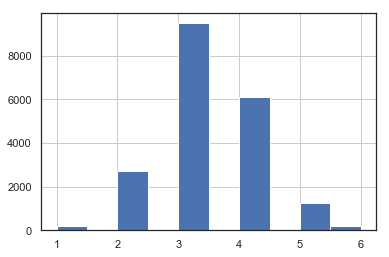

In [246]:
df.bedrooms.hist()

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


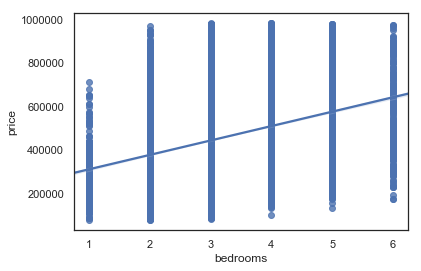

In [247]:
sns.regplot(df['bedrooms'], df['price'])

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


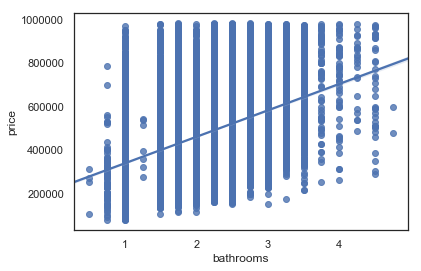

In [255]:
sns.regplot(df['bathrooms'], df['price'])

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


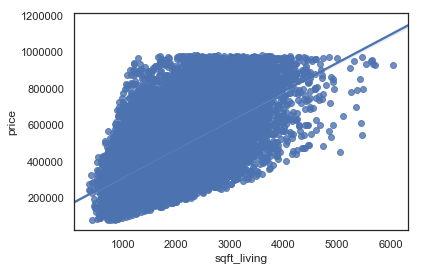

In [248]:
sns.regplot(df['sqft_living'], df['price'])

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


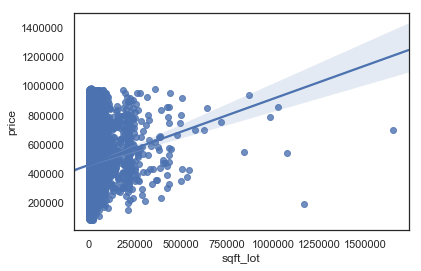

In [249]:
sns.regplot(df['sqft_lot'], df['price'])

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


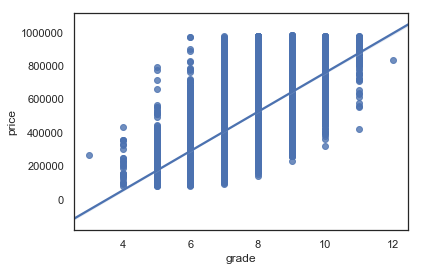

In [250]:
sns.regplot(df['grade'], df['price'])

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


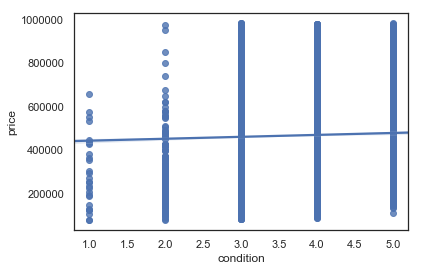

In [251]:
sns.regplot(df['condition'], df['price'])

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


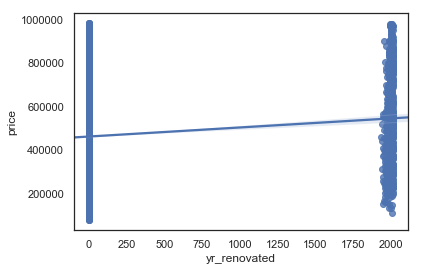

In [252]:
sns.regplot(df['yr_renovated'], df['price'])

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


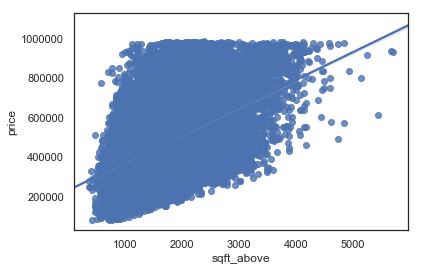

In [253]:
sns.regplot(df['sqft_above'], df['price'])

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


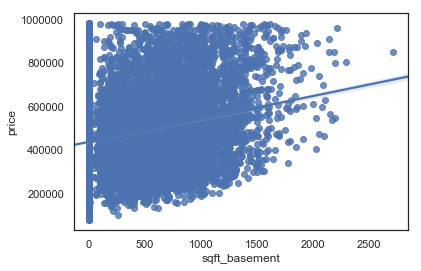

In [254]:
sns.regplot(df['sqft_basement'], df['price'])

## Creation of a "Month" column:

In [197]:
df['Month'] = df['date'].dt.month
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update,Month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,1,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,2


## Creation of a "Day of Week" column:

In [198]:
df['Day_of_Week'] = df['date'].dt.dayofweek
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update,Month,Day_of_Week
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0,10,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,12,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,1933,NaN,98028,47.7379,-122.233,2720,8062,1,2,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1965,0.0,98136,47.5208,-122.393,1360,5000,0,12,1
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0,2,2


In [199]:
df[['date','Day_of_Week']].head()

,date,Day_of_Week
0,2014-10-13,0
1,2014-12-09,1
2,2015-02-25,2
3,2014-12-09,1
4,2015-02-18,2


## Review and conversion of the "waterfront" column.

* Not all values are present.

In [200]:
df['waterfront'].value_counts(dropna=False)

 0.0    19018
NaN      2371
 1.0      146
Name: waterfront, dtype: int64

* There are nulls present.

In [201]:
df['waterfront'].unique()

array([nan,  0.,  1.])

* Are there zip codes that are predominantly waterfront?

In [202]:
df.groupby('zipcode')['waterfront'].value_counts()

zipcode  waterfront
98001    0.0           328
98002    0.0           179
98003    0.0           255
98004    0.0           278
         1.0             1
98005    0.0           158
98006    0.0           432
         1.0             4
98007    0.0           118
98008    0.0           246
         1.0             9
98010    0.0            87
98011    0.0           175
98014    0.0           110
98019    0.0           167
98022    0.0           209
98023    0.0           444
         1.0             3
98024    0.0            73
98027    0.0           368
         1.0             2
98028    0.0           254
         1.0             1
98029    0.0           293
98030    0.0           235
98031    0.0           244
98032    0.0           115
98033    0.0           372
         1.0             3
98034    0.0           478
                      ... 
98117    0.0           492
98118    0.0           442
         1.0             3
98119    0.0           165
98122    0.0           259
98125   

### Summary:
* There appears to be over 2,000 homes in the waterfront column that are nulls.
* Some of these null values in this column reside in zip codes that have waterfront and non-waterfront houses.
* Since unable to determine which are which, there will now be a third category in the waterfront column with a value of '2'.
* This will denote "unknown" if waterfront property.
* Will now convert those nulls to the value of '2' in the waterfront column.

In [203]:
df.waterfront.unique()

array([nan,  0.,  1.])

In [204]:
df['waterfront'].fillna(2, inplace=True)
df['waterfront'].unique()

array([2., 0., 1.])

In [205]:
df.isna().sum()

date                      0
price                     0
bedrooms                  0
bathrooms                 0
sqft_living               0
sqft_lot                  0
floors                    0
waterfront                0
view                     63
condition                 0
grade                     0
sqft_above                0
sqft_basement             0
yr_built                  0
yr_renovated           3828
zipcode                   0
lat                       0
long                      0
sqft_living15             0
sqft_lot15                0
yr_renovated_update       0
Month                     0
Day_of_Week               0
dtype: int64

## Evaluation of nulls in the "view" column.

In [206]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update,Month,Day_of_Week
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,2.0,0.0,3,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0,10,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,12,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,1933,NaN,98028,47.7379,-122.233,2720,8062,1,2,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1965,0.0,98136,47.5208,-122.393,1360,5000,0,12,1
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0,2,2


In [207]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [208]:
df.view.isna().sum()

63

In [209]:
df.view.value_counts(dropna=False)

 0.0    19371
 2.0      952
 3.0      507
 1.0      327
 4.0      315
NaN        63
Name: view, dtype: int64

In [210]:
df.view.value_counts(normalize=True, dropna=False)

 0.0    0.899512
 2.0    0.044207
 3.0    0.023543
 1.0    0.015185
 4.0    0.014627
NaN     0.002925
Name: view, dtype: float64

* It looks like 63 houses out of 21,000 have an unknown amount of views.  Almost 90% of houses have not been viewed.  Decision is that since less than 10% of total houses have been viewed this likely is not a critical factor.  The nulls in this column will be converted into the "zero" view value.

In [213]:
df['view'].fillna(0, inplace=True)
df['view'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: view, dtype: float64

In [214]:
df.view.isna().sum()

0

In [215]:
df.view.value_counts()

0.0    19434
2.0      952
3.0      507
1.0      327
4.0      315
Name: view, dtype: int64

In [216]:
df.view.unique()

array([0., 3., 4., 2., 1.])

## ADDRESSING SQFT_BASEMENT COLUMN:

In [217]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [218]:
df.sqft_basement.value_counts().head(20)

0.0       12807
?           452
600.0       214
500.0       209
700.0       208
800.0       200
400.0       184
1000.0      147
900.0       142
300.0       142
200.0       105
450.0       103
750.0       103
530.0       103
480.0       103
720.0        98
620.0        90
580.0        83
840.0        83
420.0        81
Name: sqft_basement, dtype: int64

* There are 452 rows with the '?' value in the sqft_basement column - this is 2.1% of the total.  Additionally, there are over 12,800 rows with a zero value in the sqft_basement column which is 59.39% of the total.  It is appropriate to convert the '?' values to a zero value, as well.  Will do this using a "replace" statement.

In [219]:
df['sqft_basement'].replace('?', 0, inplace=True)
df['sqft_basement'].value_counts().head(20)

0.0       12807
0           452
600.0       214
500.0       209
700.0       208
800.0       200
400.0       184
1000.0      147
900.0       142
300.0       142
200.0       105
750.0       103
530.0       103
450.0       103
480.0       103
720.0        98
620.0        90
840.0        83
580.0        83
420.0        81
Name: sqft_basement, dtype: int64

In [220]:
df.sqft_basement.value_counts().head()

0.0      12807
0          452
600.0      214
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21535 entries, 0 to 21596
Data columns (total 23 columns):
date                   21535 non-null datetime64[ns]
price                  21535 non-null float64
bedrooms               21535 non-null int64
bathrooms              21535 non-null float64
sqft_living            21535 non-null int64
sqft_lot               21535 non-null int64
floors                 21535 non-null float64
waterfront             21535 non-null float64
view                   21535 non-null float64
condition              21535 non-null int64
grade                  21535 non-null int64
sqft_above             21535 non-null int64
sqft_basement          21535 non-null object
yr_built               21535 non-null int64
yr_renovated           17707 non-null float64
zipcode                21535 non-null int64
lat                    21535 non-null float64
long                   21535 non-null float64
sqft_living15          21535 non-null int64
sqft_lot15             21535 

* Also need to conver the the "sqft_basement" data type to float from object since it is a continuous variable.

In [222]:
df['sqft_basement'].dtypes

dtype('O')

In [223]:
df['sqft_basement'] = df['sqft_basement'].astype('float64')

In [224]:
df['sqft_basement'].dtypes

dtype('float64')

In [225]:
df['sqft_basement'].head()

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: float64

## Adressing the nulls in the "yr_renovated" column:

In [227]:
df['yr_renovated'].isna().sum()

3828

In [228]:
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [229]:
df['yr_renovated'].value_counts(dropna=False).head()

 0.0       16969
NaN         3828
 2014.0       73
 2007.0       30
 2003.0       30
Name: yr_renovated, dtype: int64

* Safe assumption that since the majority of the "yr_renovated" column is zero (meaning the house has not been
renovated) then replacing the nulls with a zero value makes sense since it will have little impact.

In [230]:
df['yr_renovated'].fillna(0, inplace=True)
df['yr_renovated'].unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [231]:
df['yr_renovated'].value_counts().head()

0.0       20797
2014.0       73
2007.0       30
2003.0       30
2013.0       30
Name: yr_renovated, dtype: int64

## ADDRESS NUMBER OF BATHROOMS - LOOK FOR OUTLIERS:

In [232]:
df['bathrooms'].value_counts()

2.50    5374
1.00    3850
1.75    3047
2.25    2044
2.00    1929
1.50    1443
2.75    1179
3.00     744
3.50     725
3.25     587
3.75     152
4.00     128
4.50      95
4.25      77
0.75      71
4.75      21
5.00      20
5.25      12
5.50       9
1.25       9
6.00       5
0.50       4
5.75       3
6.25       2
6.50       2
8.00       1
7.75       1
6.75       1
Name: bathrooms, dtype: int64

* To remove outliers and not have them sway our model all houses with more than 5 bathrooms will be dropped.

In [233]:
df = df[df['bathrooms']<5]
df.shape

(21479, 23)

Are there any categorical columns that we need to deal with?  What about the columns with grades like:<br/>
waterfront, view, condition and grade?<br/>
* Waterfront: has 3 values and appears to be categorical.  Only options/values are 0,1 and 2.<br/>
* View: has 5 possible values for the number of views of the property (0,1,2,3,4).  This should remain numeric.<br/>
* Condition: there are 5 possible values in this column (1,2,3,4,5) and they are clearly categorical - integers<br/>
represent what is the property condition from bad to good.  So, this column should be converted to categorical<br/>
values - use one-hot encoding.<br/>
* Grade: ranges from 3 through 13 (11 values) and this denotes categories, or grades, of the quality of the property so this appears<br/>
to be a categorical option, as well.


In [235]:
df['condition'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [236]:
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

In [237]:
df['view'].unique()

array([0., 3., 4., 2., 1.])

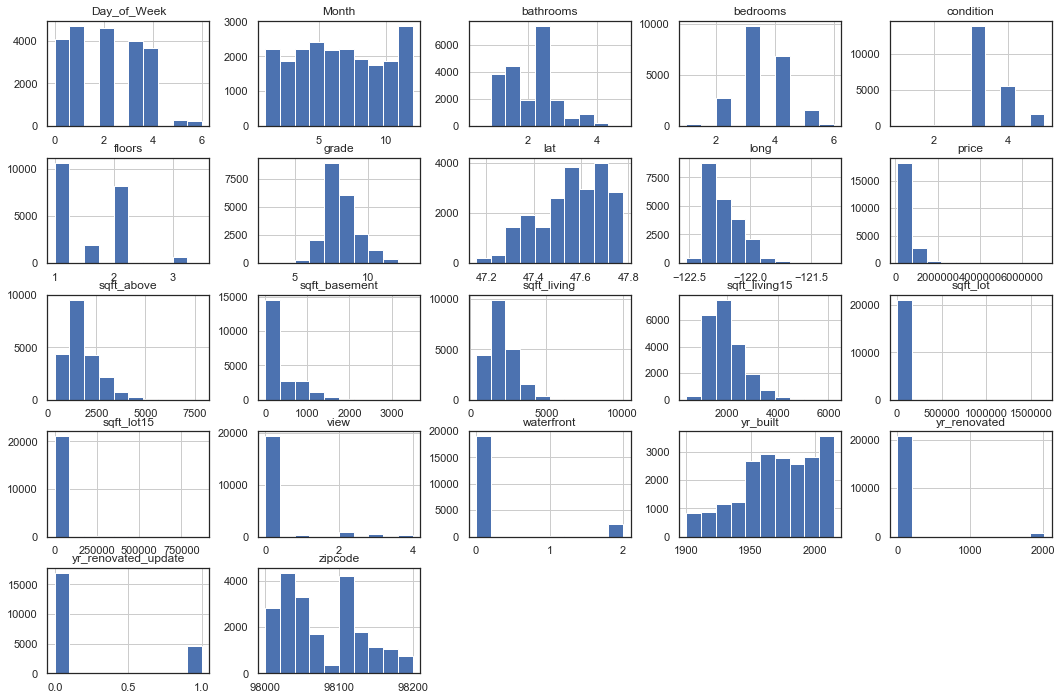

In [238]:
df.hist(figsize=(18,12))
plt.show()

## Addressing Price column and removing outliers:

* Set up histogram to review distribution of prices - there are outliers.

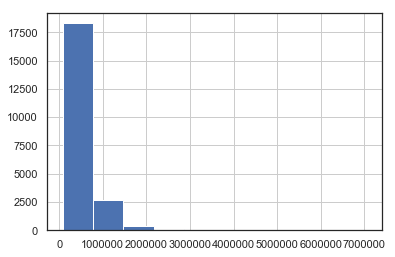

In [239]:
df['price'].hist()

In [240]:
df['price'].value_counts()

350000.0    171
450000.0    169
550000.0    158
500000.0    152
425000.0    150
325000.0    148
400000.0    145
375000.0    138
300000.0    132
525000.0    131
250000.0    130
475000.0    119
330000.0    119
650000.0    116
275000.0    113
315000.0    111
415000.0    111
390000.0    110
440000.0    109
600000.0    109
280000.0    108
320000.0    107
435000.0    105
340000.0    102
310000.0    100
335000.0     98
360000.0     96
420000.0     96
260000.0     95
265000.0     94
           ... 
451555.0      1
575575.0      1
353250.0      1
402395.0      1
271310.0      1
242150.0      1
837500.0      1
608095.0      1
287653.0      1
837700.0      1
176250.0      1
543115.0      1
641250.0      1
475500.0      1
118000.0      1
969000.0      1
386180.0      1
608500.0      1
542950.0      1
968933.0      1
575700.0      1
386100.0      1
641200.0      1
739500.0      1
418900.0      1
234975.0      1
804995.0      1
870515.0      1
336950.0      1
884744.0      1
Name: price, Length: 359

* Sorting values to see the max values in the 'price' column

In [241]:
df.sort_values(['price'], ascending=False).head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update,Month,Day_of_Week
3910,2014-06-11,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,3,...,1940,2001.0,98004,47.6500,-122.214,3930,25449,1,6,2
8629,2014-06-18,4490000.0,4,3.00,6430,27517,2.0,0.0,0.0,3,...,2001,0.0,98004,47.6208,-122.219,3720,14592,0,6,2
2083,2014-11-14,3850000.0,4,4.25,5770,21300,2.0,1.0,4.0,4,...,1980,0.0,98040,47.5850,-122.222,4620,22748,0,11,4
19002,2014-09-11,3800000.0,3,4.25,5510,35000,2.0,0.0,4.0,3,...,1997,0.0,98177,47.7296,-122.370,3430,45302,0,9,3
16288,2014-05-30,3710000.0,4,3.50,5550,28078,2.0,0.0,2.0,4,...,2000,0.0,98039,47.6395,-122.234,2980,19602,0,5,4
6502,2015-04-21,3650000.0,6,4.75,5480,19401,1.5,1.0,4.0,5,...,1936,0.0,98105,47.6515,-122.277,3510,15810,0,4,1
18467,2015-05-11,3650000.0,5,3.75,5020,8694,2.0,0.0,1.0,3,...,2007,0.0,98004,47.6146,-122.213,4190,11275,0,5,0
15241,2014-09-11,3640000.0,4,3.25,4830,22257,2.0,1.0,4.0,4,...,1990,0.0,98039,47.6409,-122.241,3820,25582,0,9,3
2862,2014-11-18,3600000.0,3,3.25,5020,12431,2.0,1.0,4.0,3,...,1941,2002.0,98144,47.5925,-122.287,3680,12620,1,11,1
21560,2015-01-07,3570000.0,5,4.50,4850,10584,2.0,1.0,4.0,3,...,2007,0.0,98008,47.5943,-122.110,3470,18270,0,1,2


* Review the quantiles of the ranges of prices to determine which should remain.

In [242]:
price_list = []
quants = [.85,.86,.87,.88,.89,.90,.91,.92,.93,.94,.95]
for i in quants:
    print(i,'-', df['price'].quantile(i))
    

0.85 - 775000.0
0.86 - 791039.9999999991
0.87 - 810000.0
0.88 - 830000.0
0.89 - 850000.0
0.9 - 878000.0
0.91 - 909489.9999999998
0.92 - 945608.0000000016
0.93 - 985000.0
0.94 - 1050000.0
0.95 - 1140000.0


* The cutoff will be at $985,000.

In [243]:
df = df.loc[df['price']<985000]
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update,Month,Day_of_Week
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,2.0,0.0,3,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0,10,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,12,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,1933,0.0,98028,47.7379,-122.233,2720,8062,1,2,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1965,0.0,98136,47.5208,-122.393,1360,5000,0,12,1
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0,2,2


In [244]:
df.shape

(19971, 23)

## SET UP A HEATMAP TO CHECK FOR MULTICOLLINEARITY:

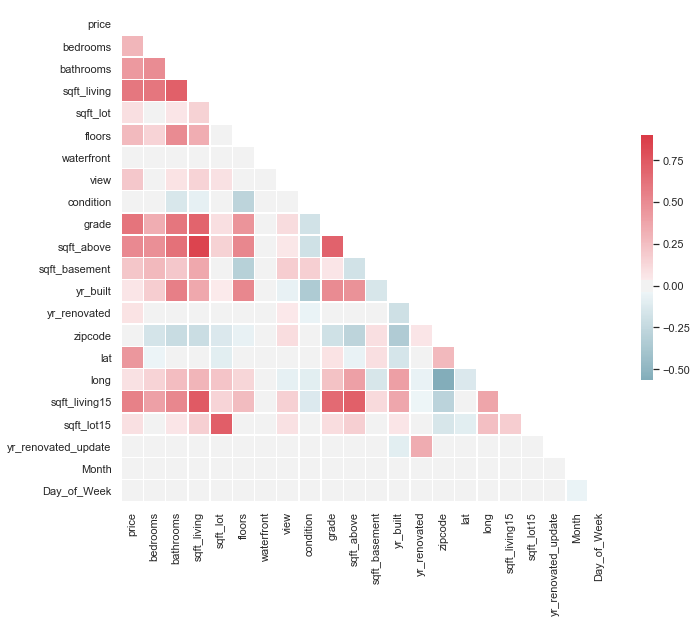

In [256]:
#set up the style of the visualization
sns.set(style='white')

#create a covariance matrix
corr = df.corr()

#generate a mask the size of the covariance matrix
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

#set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

#generate custom heat map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0, square=True, linewidths=.5, cbar_kws={'shrink':.5})

* HEATMAP: There appears to be some correlations that are significant but nothing above 0.75 so will need to review these or deal with them:<br/>
Highest correlations to Price:<br/>
grade: (0.62)  sqft_living: (0.60)  sqft_living15: (0.55)  sqft_above: (0.51)

In [257]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update,Month,Day_of_Week
price,1.000000,0.293643,0.435369,0.600874,0.092820,0.266602,0.004461,0.207967,0.029576,0.613008,...,0.062175,0.072781,-0.019044,0.443764,0.081984,0.546759,0.083803,0.025350,-0.014462,-0.002366
bedrooms,0.293643,1.000000,0.495221,0.604262,0.027407,0.155621,-0.002592,0.033348,0.023000,0.331130,...,0.177670,-0.004669,-0.162693,-0.044192,0.155648,0.392495,0.024524,-0.016854,-0.004984,0.008014
bathrooms,0.435369,0.495221,1.000000,0.706701,0.061551,0.504673,-0.001831,0.076982,-0.140525,0.608086,...,0.560459,0.014015,-0.217172,-0.020397,0.257686,0.524581,0.062850,-0.008047,0.008065,0.010015
sqft_living,0.600874,0.604262,0.706701,1.000000,0.158354,0.334435,0.001076,0.146760,-0.075511,0.692464,...,0.361639,0.013150,-0.213292,-0.003522,0.295376,0.734668,0.173289,-0.006037,0.012519,0.005169
sqft_lot,0.092820,0.027407,0.061551,0.158354,1.000000,-0.019275,0.000992,0.081599,-0.001546,0.089198,...,0.039906,0.009390,-0.130723,-0.095815,0.222582,0.143097,0.717956,-0.007268,0.000806,-0.005851
floors,0.266602,0.155621,0.504673,0.334435,-0.019275,1.000000,-0.002770,-0.018319,-0.280825,0.457489,...,0.518389,-0.007784,-0.067536,0.031798,0.137980,0.265988,-0.022709,-0.011192,0.012525,0.001177
waterfront,0.004461,-0.002592,-0.001831,0.001076,0.000992,-0.002770,1.000000,0.034865,0.003460,-0.003667,...,-0.007911,0.007560,0.015326,0.002246,-0.004121,0.000985,-0.002016,0.009223,-0.005847,0.016570
view,0.207967,0.033348,0.076982,0.146760,0.081599,-0.018319,0.034865,1.000000,0.029390,0.111693,...,-0.069165,0.048037,0.100445,-0.033547,-0.074779,0.166603,0.079431,0.024643,-0.000064,0.011846
condition,0.029576,0.023000,-0.140525,-0.075511,-0.001546,-0.280825,0.003460,0.029390,1.000000,-0.176755,...,-0.349757,-0.053685,-0.006969,-0.020163,-0.096850,-0.124517,0.003708,-0.025969,0.023589,0.009870
grade,0.613008,0.331130,0.608086,0.692464,0.089198,0.457489,-0.003667,0.111693,-0.176755,1.000000,...,0.502829,-0.020881,-0.190275,0.075024,0.235262,0.660334,0.100566,-0.018836,0.013435,0.001753


### * What are the other variables that have high correlations to each other?

### Plotting some kde's:

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


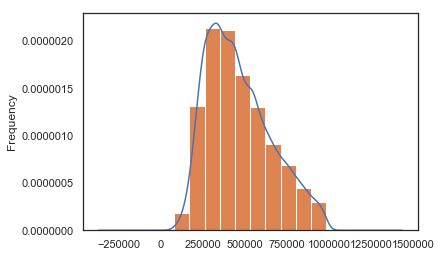

In [258]:
df['price'].plot.kde()
df['price'].plot.hist(normed=True)

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


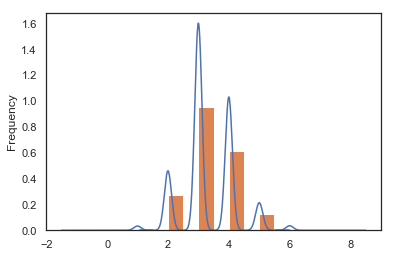

In [259]:
df['bedrooms'].plot.kde()
df['bedrooms'].plot.hist(normed=True)

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


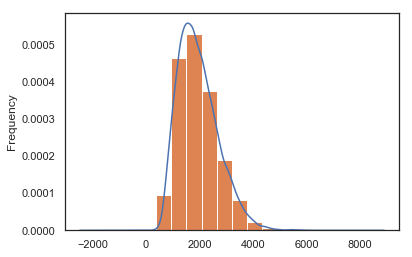

In [260]:
df['sqft_living'].plot.kde()
df['sqft_living'].plot.hist(normed=True)

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


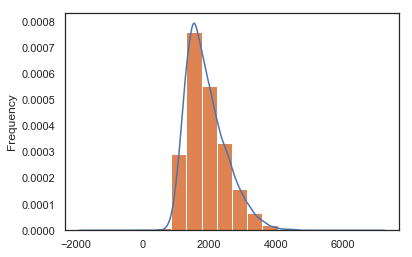

In [261]:
df['sqft_living15'].plot.kde()
df['sqft_living15'].plot.hist(normed=True)

### Plotting some jointplots:

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


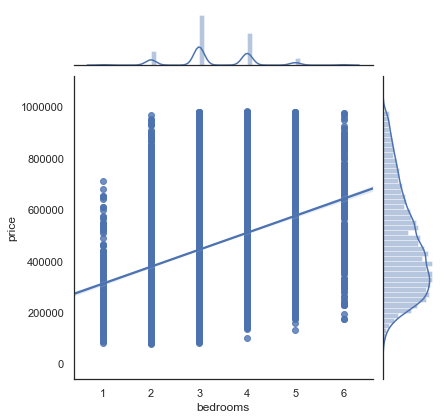

In [262]:
sns.jointplot(x=df['bedrooms'], y=df['price'], data=df, kind='reg')

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


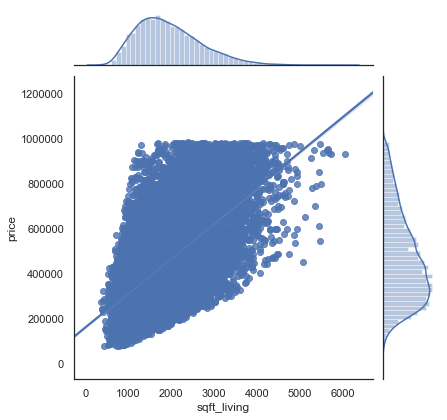

In [263]:
sns.jointplot(x=df['sqft_living'], y=df['price'], data=df, kind='reg')

### Do Log Transform here:

* Will need to remove the original "yr_renovated" column before log transform.  the "yr_renovated_update" column will remain.

* Testing to find if columns have zero values in them.

In [264]:
df[df['sqft_lot'] <10]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update,Month,Day_of_Week


In [ ]:
data_log = pd.DataFrame([])

data_log['price'] = np.log(data['price'])
data_log['sqft_living'] = np.log(data['sqft_living'])
data_log['sqft_lot'] = np.log(data['sqft_lot'])
data_log['sqft_basement'] = np.log(data['sqft_basement'])
data_log['sqft_living15'] = np.log(data['sqft_living15'])
data_log['sqft_lot15'] = np.log(data['sqft_lo15t'])

data_log.hist(figsize=[6,6]);

#can't transform anything with zero in it.  .00001 - confirmed the above 5 variables do not contain zeros.

### Need to address each column and whether continuous or category and whether it will dropped or log transformed:<br/>
* 'id' - has been dropped.<br/>
* 'date' - needs to be dropped prior to log transform.  will be kept in original df.<br/>
* 'price' - LT.  needs to be log transformed.  No zeros in price column. <br/>
* 'bedrooms' - will leave as is and not log transform.  No zeros in bedrooms column.<br/>
* 'bathrooms'- will leave as is and not log transform.  No zeros in bathrooms column.<br/>
* 'sqft_living' - LT.  needs to be log transformed.  No zeros in this column.<br/>
* 'sqft_lot' - LT.  needs to be log transformed.  No zeros in this column.<br/>
* 'floors' - LT.  needs to be log transformed.<br/>
* 'view'- will leave as is and not log transform.<br/>
* 'sqft_above' - will drop this column for now and leave in original df if need to come back to it.  Don't see it as a solild predictor right now.<br/>
* 'sqft_basement' - LT.  needs to be log transformed.<br/>
* 'yr_built' - THIS IS A CATEGORICAL VARIABLE BUT UNSURE HOW TO ADDRESS - LEAVE AS IS OR ONE-HOT ENCODE??<br/>
* 'yr_renovated' - column already converted.  Needs to be dropped prior to log transform.<br/>
* 'zipcode' - THIS IS A CATEGORICAL VARIABLE BUT UNSURE HOW TO ADDRESS - LEAVE AS IS OR ONE-HOT ENCODE??<br/>
* 'lat' - needs to be dropped prior to log transform.  will be kept in original df.<br/>
* 'long' - needs to be dropped prior to log transform.  will be kept in original df.<br/>
* 'sqft_living15' - LT.  needs to be log transformed.<br/>
* 'sqft_lot15' - LT.  needs to be log transformed.<br/>
* 'yr_renovated_update' - categorical column.  Leave as is.<br/>
* 'Month' - needs to be dropped prior to log transform.  will be kept in original df.<br/>
* 'Day_of_Week' - needs to be dropped prior to log transform.  will be kept in original df.<br/>
* 'waterfr_0.0', 'waterfr_1.0', 'waterfr_2.0' - already categorical and one-hot encoded.<br/>
* 'cond_1''cond_2', 'cond_3', 'cond_4','cond_5' - already categorical and one-hot encoded.<br/>
* 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7','grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12'] - already categorical and one-hot encoded.<br/>

WORKING ON CONVERTING "WATERFRONT", "CONDITION" AND "GRADE" COLUMNS TO CATEGORICAL VALUES

In [98]:
#Will need to convert the columns to dummie variables
water_dummies = pd.get_dummies(df['waterfront'], prefix='waterfr')
cond_dummies = pd.get_dummies(df['condition'], prefix='cond')
grade_dummies = pd.get_dummies(df['grade'], prefix='grade')

In [99]:
#next will need to remove original columns from data set, rename data set and add new columns
#renaming dataframe from "df" to "data"
data = df.drop(['waterfront', 'condition', 'grade'], axis=1)

In [100]:
#concatenate dataframe without dropped columns to new dummie columns
data = pd.concat([data, water_dummies, cond_dummies, grade_dummies], axis=1)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,...,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,1180,...,0,0,0,0,1,0,0,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,2170,...,0,0,0,0,1,0,0,0,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,770,...,0,0,0,1,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,1050,...,0,0,0,0,1,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,1680,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
pd.plotting.scatter_matrix(data, figsize=[9,9]);

In [ ]:
#log transforming to be done on:
#price: makes sense
#bedrooms: does it need it? no.
#bathrooms: does it need it? no.
#sqft_living: makes sense
#sqft_lot: makes sense
#floors: need it?  no.
#sqft_above: makes sense

In [112]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'yr_renovated_update', 'Month', 'Day_of_Week', 'waterfr_0.0',
       'waterfr_1.0', 'waterfr_2.0', 'cond_1', 'cond_2', 'cond_3', 'cond_4',
       'cond_5', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7',
       'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12'],
      dtype='object')